In [1]:
import sys
sys.dont_write_bytecode = True

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(formatter={'all': lambda x: '%.4f' % x})

from lib.gradient_descent import descenso_gradiente_estocastico, descenso_gradiente_con_momentum, descenso_gradiente_con_momentum_adam, descenso_gradiente_rmsprop
from lib.loss_functions import mse_gradient, mse

In [2]:
dataset = pd.read_csv('./data/usa-housing-modified.csv')

dataset['Avg_Area_Income'] = (
    dataset['Avg_Area_Income'] - dataset['Avg_Area_Income'].mean()
) / dataset['Avg_Area_Income'].std()
dataset['Area_Population'] = (
    dataset['Area_Population'] - dataset['Area_Population'].mean()
) / dataset['Area_Population'].std()
dataset['Price'] = (
    dataset['Price'] - dataset['Price'].mean()
) / dataset['Price'].std()

In [3]:
x = dataset[['Avg_Area_Income', 'Area_Population']].to_numpy()
y = dataset[['Price']].to_numpy()

In [4]:
sample_size = 32

In [5]:
result_sdg = descenso_gradiente_estocastico(
    x,
    y,
    alpha=0.1,
    error=0.00001,
    max_iter=100000,
    sample_size=sample_size
)

In [6]:
result_sdg_momentum = descenso_gradiente_con_momentum(
    x,
    y,
    alpha=0.1,
    error=0.00001,
    betha=0.9,
    max_iter=100000,
    sample_size=sample_size
)

In [7]:
result_sdg_momentum_adam = descenso_gradiente_con_momentum_adam(
    x,
    y,
    alpha=0.1,
    error=0.00001,
    eta1=0.9,
    eta2=0.999,
    max_iter=100000,
    sample_size=sample_size
)

In [8]:
result_rmsprop = descenso_gradiente_rmsprop(
    x,
    y,
    error=0.00001,
    step_size=0.1,
    rho=0.99,
    max_iter=100000
)

In [9]:
def print_result(method_name: str, result: dict = {}) -> None:
    if not result: 
        return None
    theta_v = result['theta']
    iters = result['iters']
    error = result['current_error']
    print(f'Method: {method_name} [iters: {iters}, thetas: {np.array(theta_v).reshape(theta_v.shape[0])}, error: {error:.6f}]')

print_result('SDG', result_sdg)
print_result('SDG With Momentum', result_sdg_momentum)
print_result('Adam', result_sdg_momentum_adam)
print_result('RMSPROP', result_rmsprop)

Method: SDG [iters: 56, thetas: [-0.1366 0.5017 0.6320], error: 0.000010]
Method: SDG With Momentum [iters: 91, thetas: [-0.1284 0.5064 0.6289], error: 0.000009]
Method: Adam [iters: 53, thetas: [-0.1365 0.5017 0.6318], error: 0.000008]
Method: RMSPROP [iters: 14, thetas: [0.0000 0.6465 0.4191], error: 0.000008]


In [10]:
thetas_sdg = np.array(result_sdg['thetas']).reshape((result_sdg['iters'] + 1, result_sdg['theta'].shape[0]))
iters_sdg = np.arange(result_sdg['iters'] + 1)

thetas_sdgm = np.array(result_sdg_momentum['thetas']).reshape((result_sdg_momentum['iters'] + 1, result_sdg_momentum['theta'].shape[0]))
iters_sdgm = np.arange(result_sdg_momentum['iters'] + 1)

thetas_sdgma = np.array(result_sdg_momentum_adam['thetas']).reshape((result_sdg_momentum_adam['iters'] + 1, result_sdg_momentum_adam['theta'].shape[0]))
iters_sdgma = np.arange(result_sdg_momentum_adam['iters'] + 1)

thetas_rmsprop = np.array(result_rmsprop['thetas']).reshape((result_rmsprop['iters'], result_rmsprop['theta'].shape[0]))
iters_rmsprop = np.arange(result_rmsprop['iters'] + 1)

theta1_sdg = thetas_sdg[:,-2]
theta2_sdg = thetas_sdg[:,-1]

theta1_sdgm = thetas_sdgm[:,-2]
theta2_sdgm = thetas_sdgm[:,-1]

theta1_sdgma = thetas_sdgma[:,-2]
theta2_sdgma = thetas_sdgma[:,-1]

theta1_rmsprop = thetas_rmsprop[:,-2]
theta2_rmsprop = thetas_rmsprop[:,-1]

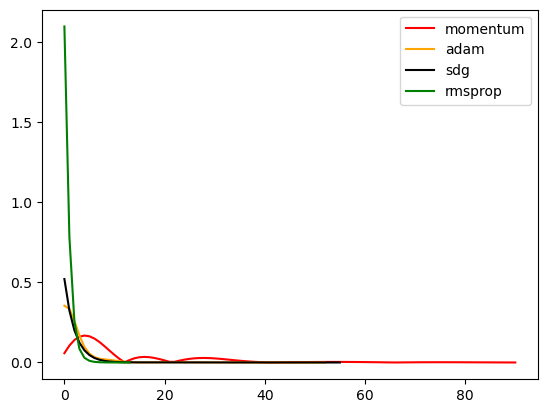

In [11]:
%matplotlib inline
plt.plot(np.arange(result_sdg_momentum['iters']), result_sdg_momentum['errors'], color= 'red', label = 'momentum')
plt.plot(np.arange(result_sdg_momentum_adam['iters']), result_sdg_momentum_adam['errors'], color= 'orange', label = 'adam')
plt.plot(np.arange(result_sdg['iters']), result_sdg['errors'], color = 'black', label = 'sdg')
plt.plot(np.arange(result_rmsprop['iters']), result_rmsprop['errors'], color = 'green', label = 'rmsprop')
plt.legend()
plt.show()

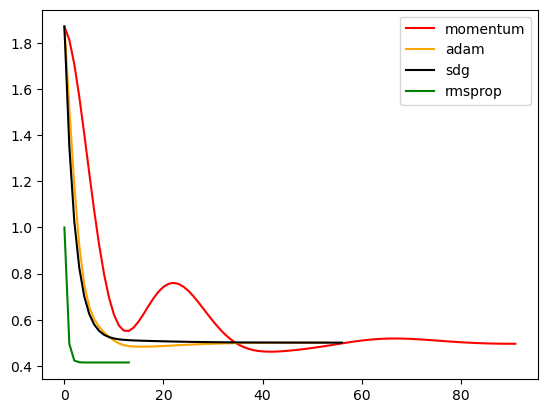

In [12]:
%matplotlib inline

x_p = np.column_stack((np.ones(x.shape[0]), x))

plt.plot(
    np.arange(result_sdg_momentum['iters'] + 1),
    [mse(np.array(result_sdg_momentum['thetas'])[i], x_p, y) for i in range(len(result_sdg_momentum['thetas']))],
    color= 'red',
    label = 'momentum'
)
plt.plot(
    np.arange(result_sdg_momentum_adam['iters'] + 1),
    [mse(np.array(result_sdg_momentum_adam['thetas'])[i], x_p, y) for i in range(len(result_sdg_momentum_adam['thetas']))],
    color= 'orange',
    label = 'adam'
)
plt.plot(
    np.arange(result_sdg['iters'] + 1),
    [mse(np.array(result_sdg['thetas'])[i], x_p, y) for i in range(len(result_sdg['thetas']))],
    color= 'black',
    label = 'sdg'
)
plt.plot(
    np.arange(result_rmsprop['iters']),
    [mse(np.array(result_rmsprop['thetas'])[i], x_p, y) for i in range(len(result_rmsprop['thetas']))],
    color= 'green',
    label = 'rmsprop'
)
plt.legend()
plt.show()

In [13]:
%matplotlib widget

y_sdg = np.array([mse(np.array(result_sdg['thetas'])[i], x_p, y) for i in range(len(result_sdg['thetas']))])
y_sdgm = np.array([mse(np.array(result_sdg_momentum['thetas'])[i], x_p, y) for i in range(len(result_sdg_momentum['thetas']))])
y_sdgma = np.array([mse(np.array(result_sdg_momentum_adam['thetas'])[i], x_p, y) for i in range(len(result_sdg_momentum_adam['thetas']))])
y_rmsprop = np.array([mse(np.array(result_rmsprop['thetas'])[i], x_p, y) for i in range(len(result_rmsprop['thetas']))])

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.plot3D(theta1_sdgm, theta2_sdgm, y_sdgm, 'red', label = 'momentum')  # type: ignore
ax.plot3D(theta1_sdgma, theta2_sdgma, y_sdgma, 'orange', label = 'adam')  # type: ignore
ax.plot3D(theta1_sdg, theta2_sdg, y_sdg, 'black', label = 'sdg')  # type: ignore
ax.plot3D(theta1_rmsprop, theta2_rmsprop, y_rmsprop, 'green', label = 'rmsprop')  # type: ignore
plt.legend()
plt.show()
